<a href="https://colab.research.google.com/github/alzdor/mashine_learning/blob/master/projectZNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2019.7z
!7z e zno_2019.7z

In [68]:
import pandas as pd 
import numpy as np 

data2019 = pd.read_csv("zno_2019.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data2019.head()

In [0]:
oblast = data2019.REGNAME.unique()
#create an empty Data frame for mean values in different regions
dataUkrObl2019 = pd.DataFrame()
#go along all regions
for oblastCurr in oblast:
  #choose rows corresponding to the current region
  dataOblCurr = data2019.loc[data2019['REGNAME'] == oblastCurr]
  #calculate total number of people who were tested in certain region
  totalNumPeopleCurr = data2019['REGNAME'].value_counts()[oblastCurr]
  #calculate number of non-appearence
  nonAppearenceCurr = dataOblCurr['UkrTestStatus'].value_counts()["Не з’явився"]
  #calculate percent of abscent people
  percentAbsent = nonAppearenceCurr / totalNumPeopleCurr * 100
  #replace NaN and 0 values to 100
  dataOblCurr['UkrBall100'].replace([np.nan, 0.0], value =100, inplace=True)
  #calculate mean mark in Ukrainian
  meanMarkUkrOblCurr = dataOblCurr.loc[:,"UkrBall100"].mean()
  #add new row with another region every loop cycle
  dataUkrObl2019 = dataUkrObl2019.append({'Область':oblastCurr, 'Середній бал':meanMarkUkrOblCurr, 'Кількість неявок':percentAbsent}, ignore_index=True)
#place columns in an appropriate order
columnsTitles=['Область','Середній бал','Кількість неявок']
dataUkrObl2019=dataUkrObl2019.reindex(columns=columnsTitles)

#dataOblCurr
dataUkrObl2019

Text(0, 0.5, 'Середній бал')

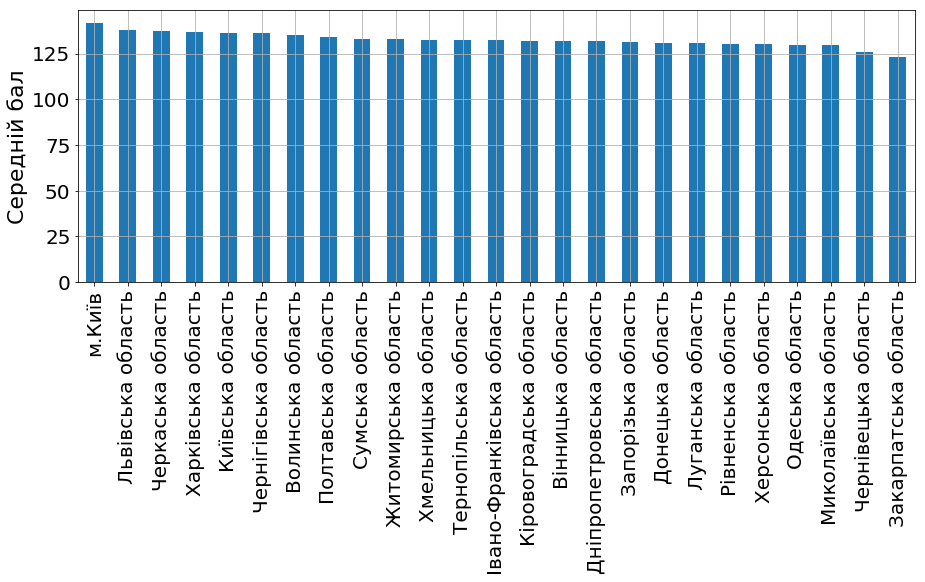

In [146]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'size'   : 22,
        'family' : 'normal',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
#sort
dataUkrObl2019 = dataUkrObl2019.sort_values('Середній бал', ascending=False)
distrib2019 = dataUkrObl2019.plot.bar( x='Область', y='Середній бал', rot=90,legend=False, width=0.5,figsize=(15,5))

#distrib = meanMarkUkrObl.plot( x='Область', y='Середній бал Укр мова', rot=90, kind='bar',legend=False)
distrib2019.grid(zorder=0)
distrib2019.set_xlabel("")
distrib2019.set_ylabel("Середній бал")

Text(0, 0.5, 'Середній бал')

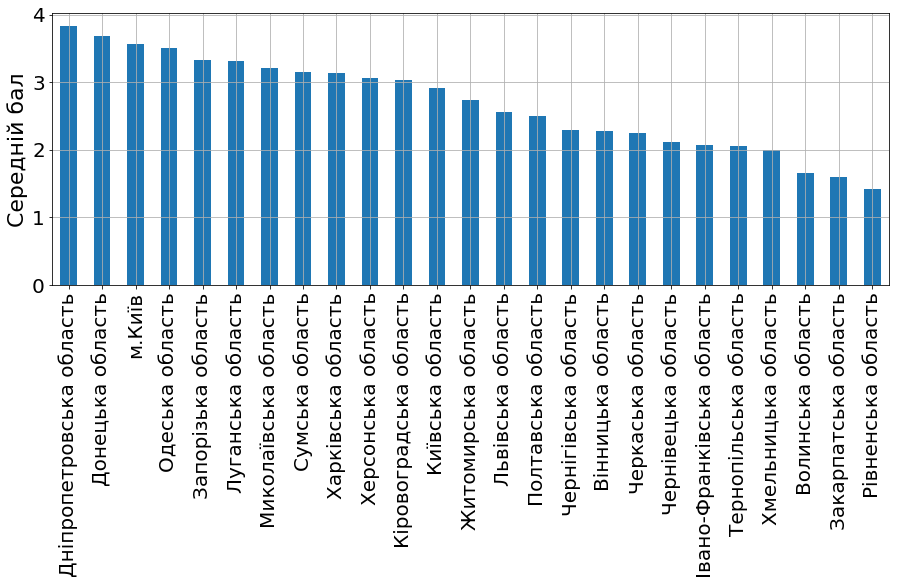

In [145]:
dataUkrObl2019 = dataUkrObl2019.sort_values('Кількість неявок', ascending=False)
distribAbsent2019 = dataUkrObl2019.plot.bar( x='Область', y='Кількість неявок', rot=90,legend=False, width=0.5,figsize=(15,5))
Середній бал
#distrib = meanMarkUkrObl.plot( x='Область', y='Середній бал Укр мова', rot=90, kind='bar',legend=False)
#sort 
distribAbsent2019.grid(zorder=0)
distribAbsent2019.set_xlabel("")
distribAbsent2019.set_ylabel("Середній бал")

In [0]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2018.7z
!7z e zno_2018.7z

In [0]:
data2018 = pd.read_csv("zno_2018.csv") 

In [100]:
oblast = meanMarkUkrObl2019.loc[:,"Область"]
oblast = oblast.values
#create an empty Data frame for mean values in different regions
meanMarkUkrObl2018 = pd.DataFrame()
#go along all regions
for oblastCurr in oblast:
  #choose rows corresponding to the current region
  dataOblCurr = data2018.loc[data2018['REGNAME'] == oblastCurr]
  #replace NaN and 0 values to 100
  dataOblCurr['UkrBall100'].replace([np.nan, 0.0], value =100, inplace=True)
  #calculate mean mark in Ukrainian
  meanMarkUkrOblCurr = dataOblCurr.loc[:,"UkrBall100"].mean()
  #add new row with another region every loop cycle
  meanMarkUkrObl2018 = meanMarkUkrObl2018.append({'Область':oblastCurr, 'Середній бал':meanMarkUkrOblCurr}, ignore_index=True)

#dataOblCurr
meanMarkUkrObl2018

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Область,Середній бал
0,м.Київ,143.211681
1,Львівська область,142.978988
2,Черкаська область,141.424997
3,Харківська область,138.361065
4,Київська область,137.059282
5,Чернігівська область,137.612387
6,Волинська область,135.524169
7,Полтавська область,135.554771
8,Сумська область,135.056942
9,Житомирська область,133.136317


Text(0, 0.5, 'Середній бал')

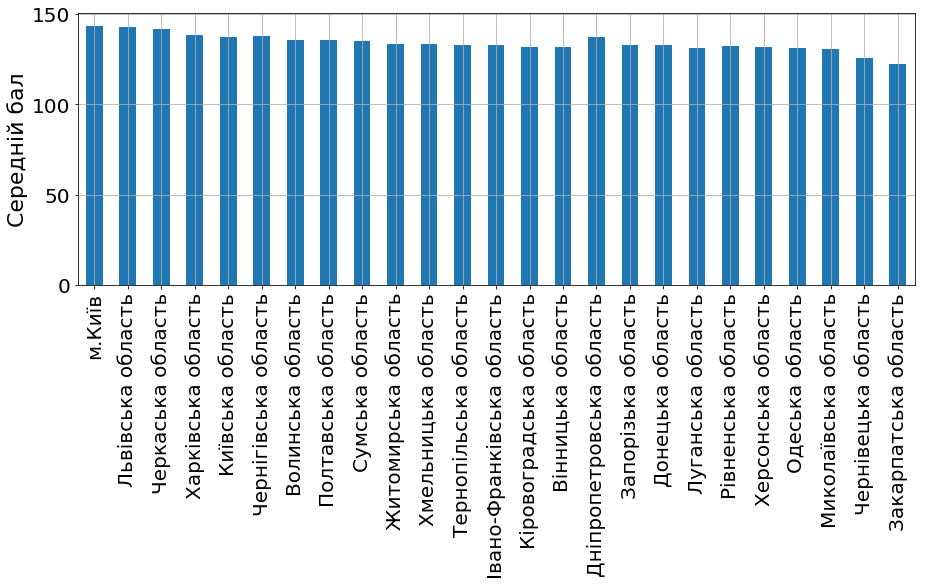

In [101]:
distrib2018 = meanMarkUkrObl2018.plot.bar( x='Область', y='Середній бал', rot=90,legend=False, width=0.5,figsize=(15,5))

#distrib = meanMarkUkrObl.plot( x='Область', y='Середній бал Укр мова', rot=90, kind='bar',legend=False)
distrib2018.grid(zorder=0)
distrib2018.set_xlabel("")
distrib2018.set_ylabel("Середній бал")


In [0]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2017.7z
!7z e zno_2017.7z


In [91]:
data2017 = pd.read_csv("zno_2017.csv") 
data2017.head(1)

,OUTID,STID,BIRTH,SEXTYPENAME,REGNAME,AREANAME,TERNAME,REGTYPENAME,TERTYPENAME,CLASSPROFILENAME,CLASSLANGNAME,EONAME,EOTYPENAME,EOREGNAME,EOAREANAME,EOTERNAME,EOPARENT,UKRTEST,UKRTESTSTATUS,UKRBALL100,UKRBALL12,UKRPTNAME,UKRPTREGNAME,UKRPTAREANAME,UKRPTTERNAME,HISTTEST,HISTLANG,HISTTESTSTATUS,HISTBALL100,HISTBALL12,HISTPTNAME,HISTPTREGNAME,HISTPTAREANAME,HISTPTTERNAME,MATHTEST,MATHLANG,MATHTESTSTATUS,MATHBALL100,MATHBALL12,MATHPTNAME,...,ENGTEST,ENGTESTSTATUS,ENGBALL100,ENGBALL12,ENGPTNAME,ENGPTREGNAME,ENGPTAREANAME,ENGPTTERNAME,FRATEST,FRATESTSTATUS,FRABALL100,FRABALL12,FRAPTNAME,FRAPTREGNAME,FRAPTAREANAME,FRAPTTERNAME,DEUTEST,DEUTESTSTATUS,DEUBALL100,DEUBALL12,DEUPTNAME,DEUPTREGNAME,DEUPTAREANAME,DEUPTTERNAME,SPATEST,SPATESTSTATUS,SPABALL100,SPABALL12,SPAPTNAME,SPAPTREGNAME,SPAPTAREANAME,SPAPTTERNAME,RUSTEST,RUSTESTSTATUS,RUSBALL100,RUSBALL12,RUSPTNAME,RUSPTREGNAME,RUSPTAREANAME,RUSPTTERNAME
0,EDDDC0A3-C615-4101-96B3-9F1A4C654A2C,14809269-9F28-454C-8B3B-01DE067C91F3,1999,жіноча,Житомирська область,Новоград-Волинський район,смт Городниця,Випускник минулих років,місто,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Англійська мова,Зараховано,197.0,NaN,Загальноосвітня школа І-ІІІ ступенів №21 м. Жи...,Житомирська область,м.Житомир. Корольовський район міста,Корольовський район міста,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#create an empty Data frame for mean values in different regions
meanMarkUkrObl2017 = pd.DataFrame()
#go along all regions
for oblastCurr in oblast:
  #choose rows corresponding to the current region
  dataOblCurr = data2017.loc[data2017['REGNAME'] == oblastCurr]
  #replace NaN and 0 values to 100
  dataOblCurr['UKRBALL100'].replace([np.nan, 0.0], value =100, inplace=True)
  #calculate mean mark in Ukrainian
  meanMarkUkrOblCurr = dataOblCurr.loc[:,"UKRBALL100"].mean()
  #add new row with another region every loop cycle
  meanMarkUkrObl2017 = meanMarkUkrObl2017.append({'Область':oblastCurr, 'Середній бал':meanMarkUkrOblCurr}, ignore_index=True)

meanMarkUkrObl2017

Text(0, 0.5, 'Середній бал')

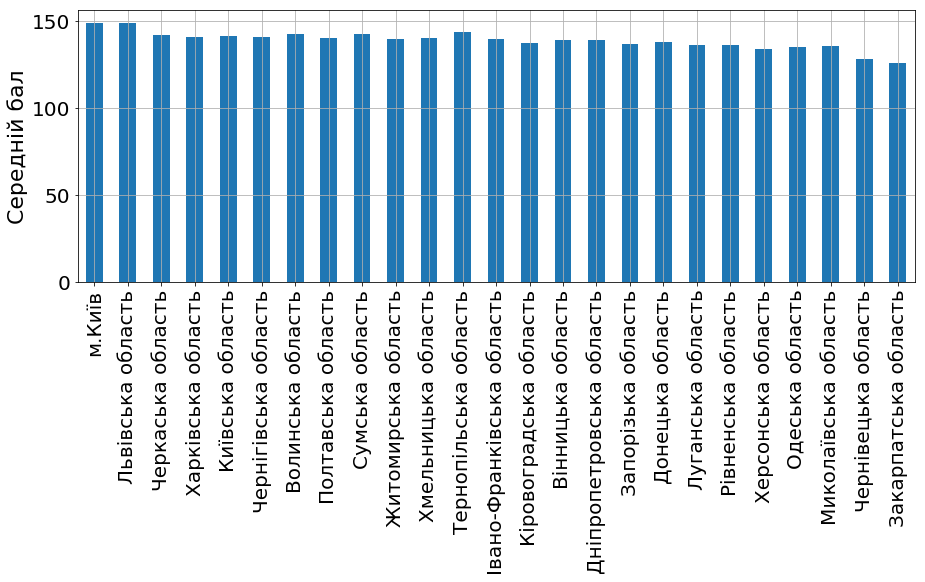

In [99]:
distrib2017 = meanMarkUkrObl2017.plot.bar( x='Область', y='Середній бал', rot=90,legend=False, width=0.5,figsize=(15,5))

distrib2017.grid(zorder=0)
distrib2017.set_xlabel("")
distrib2017.set_ylabel("Середній бал")